In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dateparser

# DEFINE PROBLEM

- Dataset is taken from historical sales transaction in 3 different branch and city of supermarket located in Myanmar for Jan-Mar 2019 Period. 
- Q2 sales is targeted increase from Q1 Period

# DEFINE GOALS

- Increase Q2 2019 Supermarket Sales trough transaction data analysis
- Optimize cashier shift through transaction data analysis

#### IMPORT FILE

In [2]:
df = pd.read_csv('supermarket.csv')

#### DATA TYPE OVERALL CHECK

In [3]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
print(df.shape)

(1000, 17)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [6]:
## df.head(), df.shape, df.info() is utilized to capture dataset genereal information

# DESCRIPTIVE ANALYSIS, HANDLING OUTLIERS, AND HANDLING MISSING VALUE

#### DESCRIPTIVE ANALYSIS

In [7]:
df.describe(include = 'O')
## To get general information of Categorical Statistic
## From this table We know, top transaction is occured in Yangon branch 
## Member customers are top customers in Supermarket
## Female is dominate to shop in Suoermarket
## Fashion accessoris is the best seller item in Super market
## Most transation occured on 19:48 
## Ewallet is dominate for payment methond transaction
## ==> We will do deeper analysis in Univariate & Multivariate Analysis

,Invoice ID,Branch,City,Customer type,Gender,Product line,Date,Time,Payment
count,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,3,3,2,2,6,89,506,3
top,830-58-2383,A,Yangon,Member,Female,Fashion accessories,2/7/2019,14:42,Ewallet
freq,1,340,340,501,501,178,20,7,345


In [8]:
df['Branch'].unique()
# To get branch code of supermarket

array(['A', 'C', 'B'], dtype=object)

In [9]:
df['City'].unique()
## To get location of supermarket branch ==> Located in three different Area

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

In [10]:
pd.concat([df['Branch'], df['City']], axis=1)

# Branch A => Located in Yangon
# Branch B => Located in Mandalay
# Branch C => Located in Naypyitaw

,Branch,City
0,A,Yangon
1,C,Naypyitaw
2,A,Yangon
3,A,Yangon
4,A,Yangon
...,...,...
995,C,Naypyitaw
996,B,Mandalay
997,A,Yangon
998,A,Yangon


In [11]:
df['Customer type'].unique()
## To get unique Cutomer Type Value ==> There are two types of supermarket customer

array(['Member', 'Normal'], dtype=object)

In [12]:
df['Gender'].unique()
## To get unique Gender Value

array(['Female', 'Male'], dtype=object)

In [13]:
df['Product line'].unique()
## To get unique value of product line ==> There are 6 Product Line sold in Supermarket

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

In [14]:
df['Payment'].unique()
## To get unique value of Payment Method ==> There are 3 methods of payment in Supermarket

array(['Ewallet', 'Cash', 'Credit card'], dtype=object)

In [15]:
round(df.describe(),2)
## To get general information of numerical columns
## Range unit price sell in supermarket is between 10.08 and 99.96 Myanmar Kyat with average 55.56 Kyat
## Top quantity customers buy in one transaction is 10, where the average is 5.51
## Max Rating customer given to Supermarket is 10, and Min Rating is 4
## Gross income range in supermarket is between 0.51 and 49.

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,55.67,5.51,15.38,322.97,307.59,4.76,15.38,6.97
std,26.49,2.92,11.71,245.89,234.18,0.00,11.71,1.72
min,10.08,1.00,0.51,10.68,10.17,4.76,0.51,4.00
25%,32.88,3.00,5.92,124.42,118.50,4.76,5.92,5.50
50%,55.23,5.00,12.09,253.85,241.76,4.76,12.09,7.00
75%,77.94,8.00,22.45,471.35,448.90,4.76,22.45,8.50
max,99.96,10.00,49.65,1042.65,993.00,4.76,49.65,10.00


In [16]:
round(df.corr(),2)
## Unit price & Quantity is positively correlated with COGS and Gross income
## Rating hardly has many correlation with other variables

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.00,0.01,0.63,0.63,0.63,-0.0,0.63,-0.01
Quantity,0.01,1.00,0.71,0.71,0.71,-0.0,0.71,-0.02
Tax 5%,0.63,0.71,1.00,1.00,1.00,0.0,1.00,-0.04
Total,0.63,0.71,1.00,1.00,1.00,0.0,1.00,-0.04
cogs,0.63,0.71,1.00,1.00,1.00,0.0,1.00,-0.04
gross margin percentage,-0.00,-0.00,0.00,0.00,0.00,1.0,0.00,0.00
gross income,0.63,0.71,1.00,1.00,1.00,0.0,1.00,-0.04
Rating,-0.01,-0.02,-0.04,-0.04,-0.04,0.0,-0.04,1.00


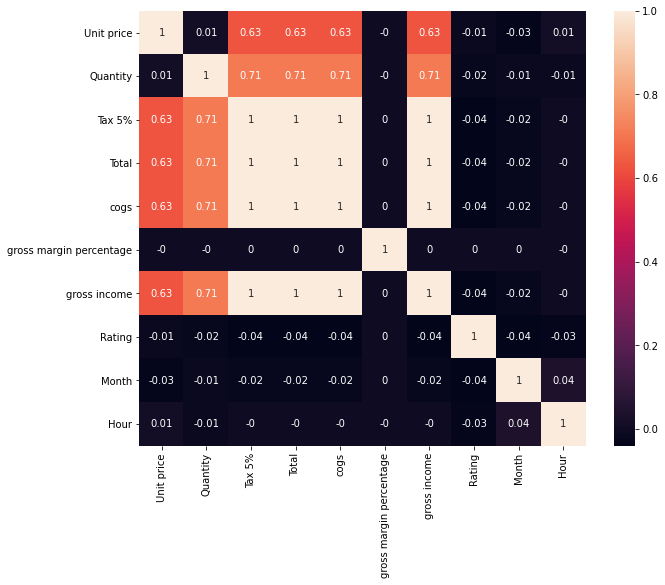

In [93]:
plt.figure(figsize=(10,8))
sns.heatmap(round(df.corr(),2), annot=True)
plt.show()

#### MISSING VALUE CHECK & HANDLING

In [17]:
df.isna().sum()
## From information below, dataset has no missing value. So, we don't need to drop or fill any value into dataset.

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

#### OUTLIERS CHECK & HANDLING

In [18]:
outliers = []
def cek_outlier(data):
    sorted(data)
    q1, q3 = np.percentile(data, [25,75])
    iqr = q3-q1
    lower_fence = q1 - (1.5 * iqr)
    upper_fence = q3 + (1.5 * iqr)
    for i in data:
        if i < lower_fence or i > upper_fence:
            outliers.append(i)
    return outliers

In [19]:
outliers = []
cek_outlier(df['Unit price'])

[]

In [20]:
outliers = []
cek_outlier(df['Quantity'])

[]

In [21]:
outliers = []
cek_outlier(df['Total'])

[1003.59,
 1039.29,
 1042.65,
 1002.12,
 1020.705,
 1034.46,
 1023.75,
 1022.385,
 1022.49]

In [22]:
df[df['Total'].isin(outliers)]
## To see which transaction cause outliers value of total

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
166,234-65-2137,C,Naypyitaw,Normal,Male,Home and lifestyle,95.58,10,47.790,1003.590,1/16/2019,13:32,Cash,955.8,4.761905,47.790,4.8
167,687-47-8271,A,Yangon,Normal,Male,Fashion accessories,98.98,10,49.490,1039.290,2/8/2019,16:20,Credit card,989.8,4.761905,49.490,8.7
350,860-79-0874,C,Naypyitaw,Member,Female,Fashion accessories,99.30,10,49.650,1042.650,2/15/2019,14:53,Credit card,993.0,4.761905,49.650,6.6
357,554-42-2417,C,Naypyitaw,Normal,Female,Sports and travel,95.44,10,47.720,1002.120,1/9/2019,13:45,Cash,954.4,4.761905,47.720,5.2
422,271-88-8734,C,Naypyitaw,Member,Female,Fashion accessories,97.21,10,48.605,1020.705,2/8/2019,13:00,Credit card,972.1,4.761905,48.605,8.7
557,283-26-5248,C,Naypyitaw,Member,Female,Food and beverages,98.52,10,49.260,1034.460,1/30/2019,20:23,Ewallet,985.2,4.761905,49.260,4.5
699,751-41-9720,C,Naypyitaw,Normal,Male,Home and lifestyle,97.50,10,48.750,1023.750,1/12/2019,16:18,Ewallet,975.0,4.761905,48.750,8.0
792,744-16-7898,B,Mandalay,Normal,Female,Home and lifestyle,97.37,10,48.685,1022.385,1/15/2019,13:48,Credit card,973.7,4.761905,48.685,4.9
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.690,1022.490,3/2/2019,17:16,Ewallet,973.8,4.761905,48.690,4.4


In [23]:
outliers = []
cek_outlier(df['cogs'])

[955.8, 989.8, 993.0, 954.4, 972.1, 985.2, 975.0, 973.7, 973.8]

In [24]:
df[df['cogs'].isin(outliers)]
## To see which transaction cause outliers value of cogs

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
166,234-65-2137,C,Naypyitaw,Normal,Male,Home and lifestyle,95.58,10,47.790,1003.590,1/16/2019,13:32,Cash,955.8,4.761905,47.790,4.8
167,687-47-8271,A,Yangon,Normal,Male,Fashion accessories,98.98,10,49.490,1039.290,2/8/2019,16:20,Credit card,989.8,4.761905,49.490,8.7
350,860-79-0874,C,Naypyitaw,Member,Female,Fashion accessories,99.30,10,49.650,1042.650,2/15/2019,14:53,Credit card,993.0,4.761905,49.650,6.6
357,554-42-2417,C,Naypyitaw,Normal,Female,Sports and travel,95.44,10,47.720,1002.120,1/9/2019,13:45,Cash,954.4,4.761905,47.720,5.2
422,271-88-8734,C,Naypyitaw,Member,Female,Fashion accessories,97.21,10,48.605,1020.705,2/8/2019,13:00,Credit card,972.1,4.761905,48.605,8.7
557,283-26-5248,C,Naypyitaw,Member,Female,Food and beverages,98.52,10,49.260,1034.460,1/30/2019,20:23,Ewallet,985.2,4.761905,49.260,4.5
699,751-41-9720,C,Naypyitaw,Normal,Male,Home and lifestyle,97.50,10,48.750,1023.750,1/12/2019,16:18,Ewallet,975.0,4.761905,48.750,8.0
792,744-16-7898,B,Mandalay,Normal,Female,Home and lifestyle,97.37,10,48.685,1022.385,1/15/2019,13:48,Credit card,973.7,4.761905,48.685,4.9
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.690,1022.490,3/2/2019,17:16,Ewallet,973.8,4.761905,48.690,4.4


In [25]:
outliers = []
cek_outlier(df['gross income'])

[47.79, 49.49, 49.65, 47.72, 48.605, 49.26, 48.75, 48.685, 48.69]

In [26]:
df[df['gross income'].isin(outliers)]
## To see which transaction cause outliers value of gross income

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
166,234-65-2137,C,Naypyitaw,Normal,Male,Home and lifestyle,95.58,10,47.790,1003.590,1/16/2019,13:32,Cash,955.8,4.761905,47.790,4.8
167,687-47-8271,A,Yangon,Normal,Male,Fashion accessories,98.98,10,49.490,1039.290,2/8/2019,16:20,Credit card,989.8,4.761905,49.490,8.7
350,860-79-0874,C,Naypyitaw,Member,Female,Fashion accessories,99.30,10,49.650,1042.650,2/15/2019,14:53,Credit card,993.0,4.761905,49.650,6.6
357,554-42-2417,C,Naypyitaw,Normal,Female,Sports and travel,95.44,10,47.720,1002.120,1/9/2019,13:45,Cash,954.4,4.761905,47.720,5.2
422,271-88-8734,C,Naypyitaw,Member,Female,Fashion accessories,97.21,10,48.605,1020.705,2/8/2019,13:00,Credit card,972.1,4.761905,48.605,8.7
557,283-26-5248,C,Naypyitaw,Member,Female,Food and beverages,98.52,10,49.260,1034.460,1/30/2019,20:23,Ewallet,985.2,4.761905,49.260,4.5
699,751-41-9720,C,Naypyitaw,Normal,Male,Home and lifestyle,97.50,10,48.750,1023.750,1/12/2019,16:18,Ewallet,975.0,4.761905,48.750,8.0
792,744-16-7898,B,Mandalay,Normal,Female,Home and lifestyle,97.37,10,48.685,1022.385,1/15/2019,13:48,Credit card,973.7,4.761905,48.685,4.9
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.690,1022.490,3/2/2019,17:16,Ewallet,973.8,4.761905,48.690,4.4


In [27]:
outliers = []
cek_outlier(df['Rating'])

[]

In [28]:
df[df['Quantity'] == 10]
## Cek Howmany Transaction with Quantity 10

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.780,772.380,2/24/2019,11:38,Ewallet,735.6,4.761905,36.780,8.0
13,252-56-2699,A,Yangon,Normal,Male,Food and beverages,43.19,10,21.595,453.495,2/7/2019,16:48,Ewallet,431.9,4.761905,21.595,8.2
14,829-34-3910,A,Yangon,Normal,Female,Health and beauty,71.38,10,35.690,749.490,3/29/2019,19:21,Cash,713.8,4.761905,35.690,5.7
49,574-22-5561,C,Naypyitaw,Member,Female,Fashion accessories,82.63,10,41.315,867.615,3/19/2019,17:08,Ewallet,826.3,4.761905,41.315,7.9
58,817-48-8732,A,Yangon,Member,Female,Home and lifestyle,72.35,10,36.175,759.675,1/20/2019,15:55,Cash,723.5,4.761905,36.175,5.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,746-04-1077,B,Mandalay,Member,Female,Food and beverages,84.63,10,42.315,888.615,1/1/2019,11:36,Credit card,846.3,4.761905,42.315,9.0
988,267-62-7380,C,Naypyitaw,Member,Male,Electronic accessories,82.34,10,41.170,864.570,3/29/2019,19:12,Ewallet,823.4,4.761905,41.170,4.3
991,602-16-6955,B,Mandalay,Normal,Female,Sports and travel,76.60,10,38.300,804.300,1/24/2019,18:10,Ewallet,766.0,4.761905,38.300,6.0
993,690-01-6631,B,Mandalay,Normal,Male,Fashion accessories,17.49,10,8.745,183.645,2/22/2019,18:35,Ewallet,174.9,4.761905,8.745,6.6


In [29]:
df_outliers = pd.concat([df['Unit price'], df['Quantity'], df['Total'], df['cogs'], df['gross income'], df['Rating']], axis=1)
## Create DF outliers for outliers visualization

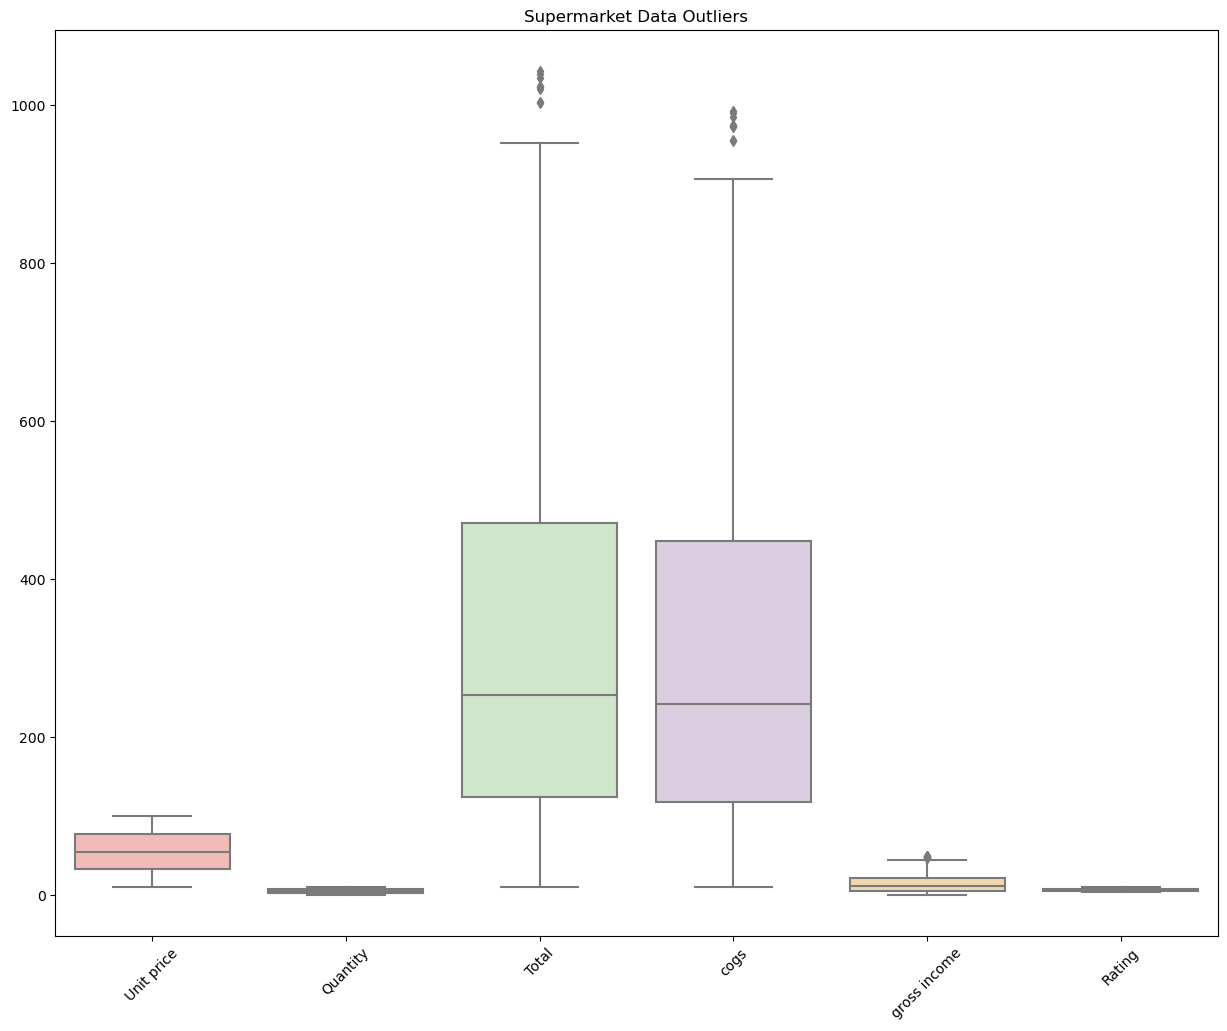

In [30]:
plt.figure(figsize=(15,12),dpi=100)
sns.boxplot(data=df_outliers, palette='Pastel1' )
plt.title("Supermarket Data Outliers")
plt.xticks(rotation=45)
plt.show()
## Visualize Outliers Value 

In [31]:
### Outliers value happen when in one transaction, customers buy 10 item with individual item price > 95 Myanmar Kyat

#### DATE AND TIME HANDLING

In [32]:
df.dtypes
## Knowing current type data of Date & Time ==> Still in object type

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [33]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
## Change Date Tipe Type Data Into datetime64

In [34]:
df.dtypes
## Date & Time Data have been changed

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object

In [35]:
purchase_date = df['Date'].dt

In [36]:
df['Month'] = purchase_date.month
df['Day Name'] = purchase_date.day_name()
## Make Month & Day Name Column for further analysis

In [37]:
hari = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['Day Name'] = pd.Categorical(df['Day Name'], categories=hari, ordered=True)

In [38]:
purchase_time = df['Time'].apply(dateparser.parse).dt

In [39]:
df['Hour'] = purchase_time.hour
## Create Hour Colum (Bottom Rounding) for further analysis

# EXPLORATORY DATA ANALYSIS & DATA VISUALIZATION

In [40]:
df.head()
## See Current Table

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month,Day Name,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1,Saturday,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,3,Friday,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,Sunday,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,1,Sunday,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2,Friday,10


#### UNIVARIATE ANALYSIS

In [57]:
df_city = df.pivot_table(index='City', values='Quantity', aggfunc='sum').sort_values('Quantity', ascending=False).reset_index()
df_city.rename(columns = {'Quantity':'Sales'}, inplace=True)
df_city
### Yangon Supermarket has the highest sales

,City,Sales
0,Yangon,1859
1,Naypyitaw,1831
2,Mandalay,1820


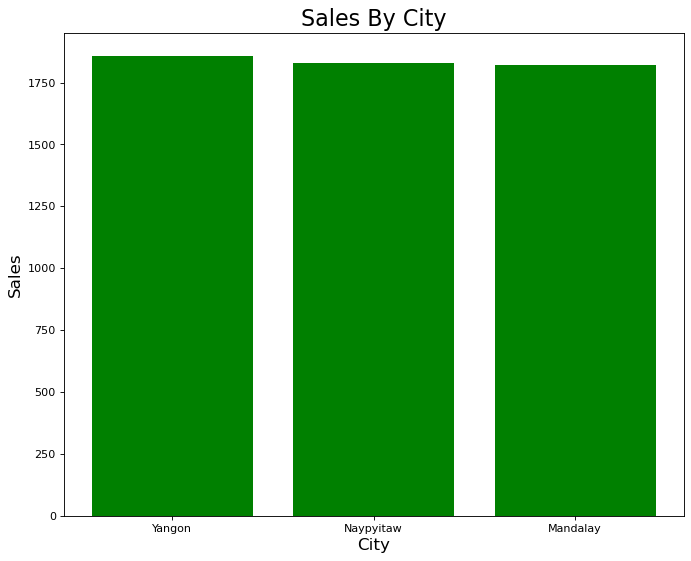

In [71]:
plt.figure(figsize=(10,8), dpi = 80)
plt.bar(df_city['City'], df_city['Sales'], color='GREEN')
plt.title('Sales By City', size =20)
plt.xlabel("City",size = 15)
plt.ylabel("Sales", size = 15)
plt.show()
### Yangon Supermarket has the highest sales but has little difference with other branch

In [58]:
df_customertype = df.pivot_table(index='Customer type', values='Quantity', aggfunc='sum').sort_values('Quantity', ascending=False).reset_index()
df_customertype.rename(columns = {'Quantity':'Sales'}, inplace=True)
df_customertype
## Pembeli supermarket imbang antara member dan non member

,Customer type,Sales
0,Member,2785
1,Normal,2725


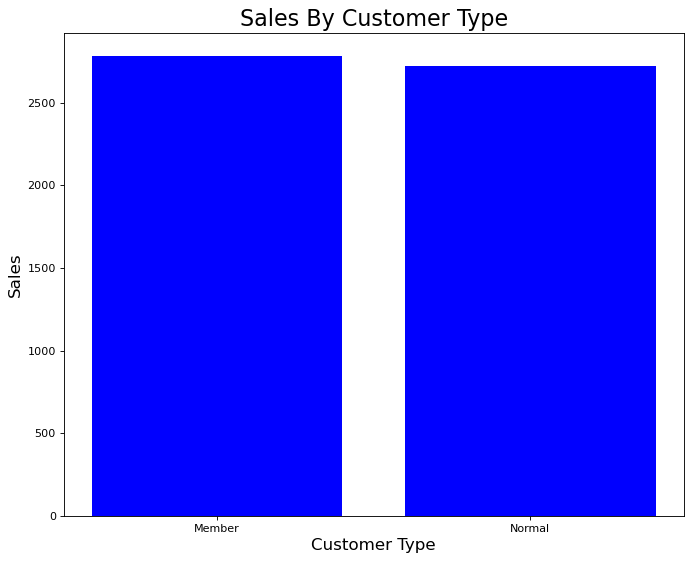

In [75]:
plt.figure(figsize=(10,8), dpi = 80)
plt.bar(df_customertype['Customer type'], df_customertype['Sales'], color='Blue')
plt.title('Sales By Customer Type', size =20)
plt.xlabel("Customer Type",size = 15)
plt.ylabel("Sales", size = 15)
plt.show()

In [60]:
df_gender= df.pivot_table(index='Gender', values='Quantity', aggfunc='sum').sort_values('Quantity', ascending=False).reset_index()
df_gender.rename(columns = {'Quantity':'Sales'}, inplace=True)
df_gender
## Female more dominate as customers in supermarket sales

,Gender,Sales
0,Female,2869
1,Male,2641


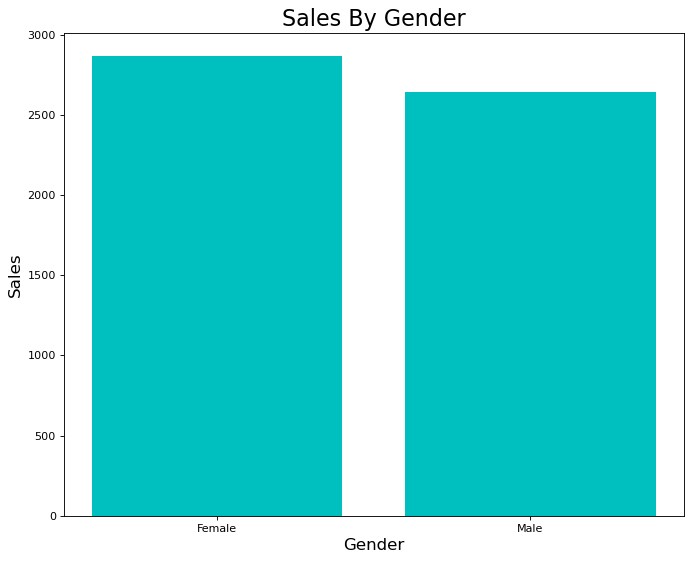

In [82]:
plt.figure(figsize=(10,8), dpi = 80)
plt.bar(df_gender['Gender'], df_gender['Sales'], color='c')
plt.title('Sales By Gender', size =20)
plt.xlabel("Gender",size = 15)
plt.ylabel("Sales", size = 15)
plt.show()
## Female more dominate as customers in supermarket sales

In [61]:
df_productline = df.pivot_table(index='Product line', values='Quantity', aggfunc='sum').sort_values('Quantity', ascending=False).reset_index()
df_productline.rename(columns = {'Quantity':'Sales'}, inplace=True)
df_productline
## Product yang paling laku adalah Fashion Accessoris dan paling tidak laku adalah HEalth and Beauty

,Product line,Sales
0,Electronic accessories,971
1,Food and beverages,952
2,Sports and travel,920
3,Home and lifestyle,911
4,Fashion accessories,902
5,Health and beauty,854


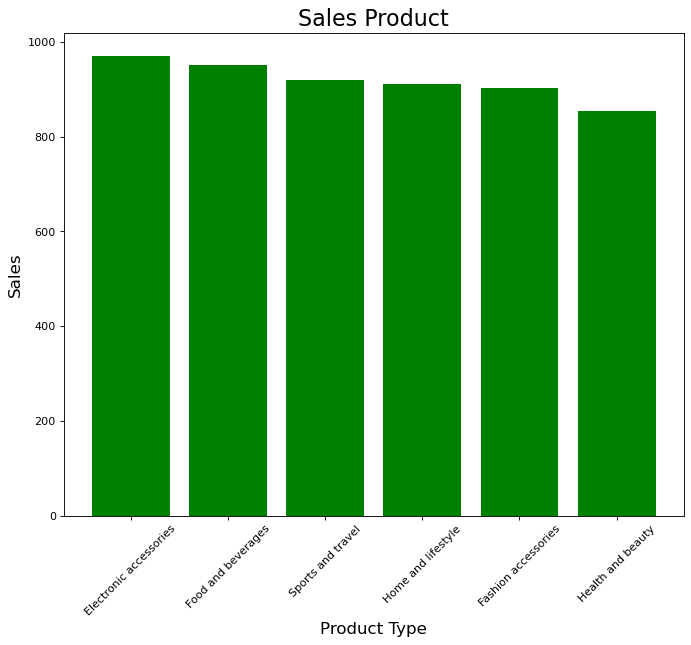

In [83]:
plt.figure(figsize=(10,8), dpi = 80)
plt.bar(df_productline['Product line'], df_productline['Sales'], color='green')
plt.title('Sales Product', size =20)
plt.xlabel("Product Type",size = 15)
plt.ylabel("Sales", size = 15)
plt.xticks(rotation=45)
plt.show()

In [66]:
df_payment = df.pivot_table(index='Payment', values='Total', aggfunc='count').sort_values('Total', ascending=False).reset_index()
df_payment.rename(columns = {'Total':'Transaction'}, inplace=True)
df_payment
## Customer lebih cenderung memilih metode pembayaran cash dan ewallet dibandingkan credit card

,Payment,Transaction
0,Ewallet,345
1,Cash,344
2,Credit card,311


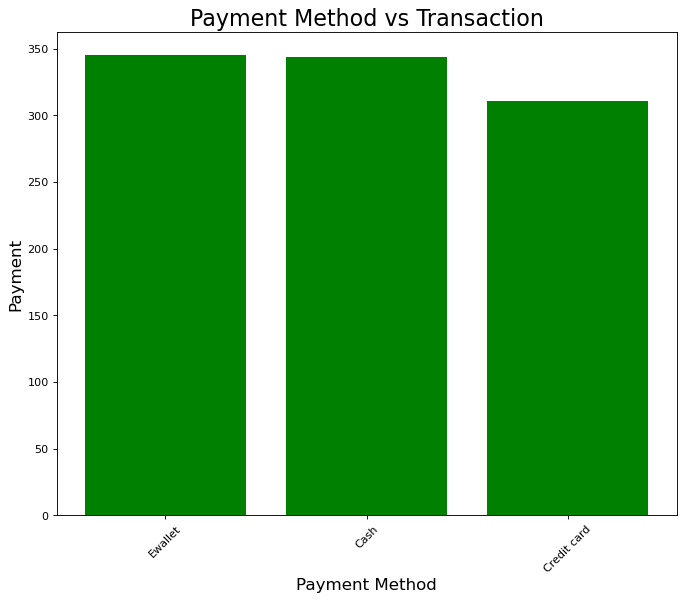

In [84]:
plt.figure(figsize=(10,8), dpi = 80)
plt.bar(df_payment['Payment'], df_payment['Transaction'], color='green')
plt.title('Payment Method vs Transaction', size =20)
plt.xlabel("Payment Method",size = 15)
plt.ylabel("Payment", size = 15)
plt.xticks(rotation=45)
plt.show()

In [87]:
df_dayname = df.pivot_table(index='Day Name', values='Total', aggfunc='count').reset_index()
df_dayname.rename(columns = {'Total':'Transaction'}, inplace=True)
df_dayname
## Transaksi tertinggi terjadi pada hari Sabtu dan Selasa

,Day Name,Transaction
0,Monday,125
1,Tuesday,158
2,Wednesday,143
3,Thursday,138
4,Friday,139
5,Saturday,164
6,Sunday,133


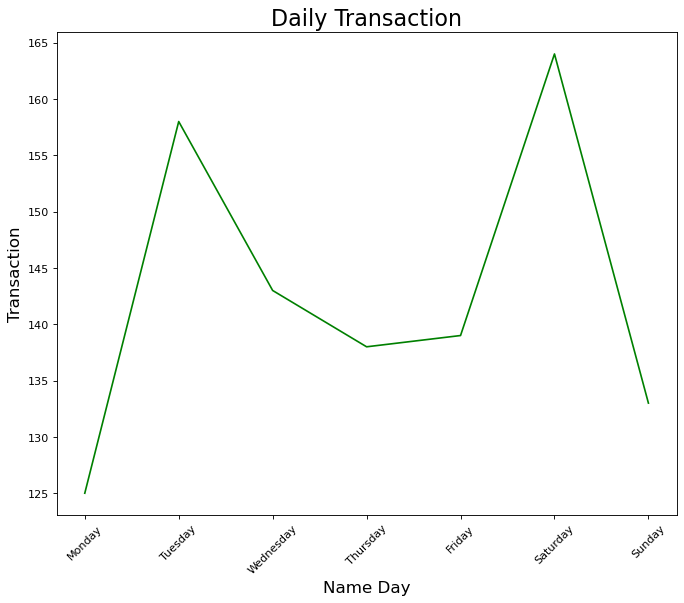

In [88]:
plt.figure(figsize=(10,8), dpi = 80)
plt.plot(df_dayname['Day Name'], df_dayname['Transaction'], color='green')
plt.title('Daily Transaction', size =20)
plt.xlabel("Name Day",size = 15)
plt.ylabel("Transaction", size = 15)
plt.xticks(rotation=45)
plt.show()

In [65]:
df_time = df.pivot_table(index='Hour', values='Total', aggfunc='count').reset_index()
df_time.rename(columns = {'Total':'Transaction'}, inplace=True)
df_time

,Hour,Transaction
0,10,101
1,11,90
2,12,89
3,13,103
4,14,83
5,15,102
6,16,77
7,17,74
8,18,93
9,19,113


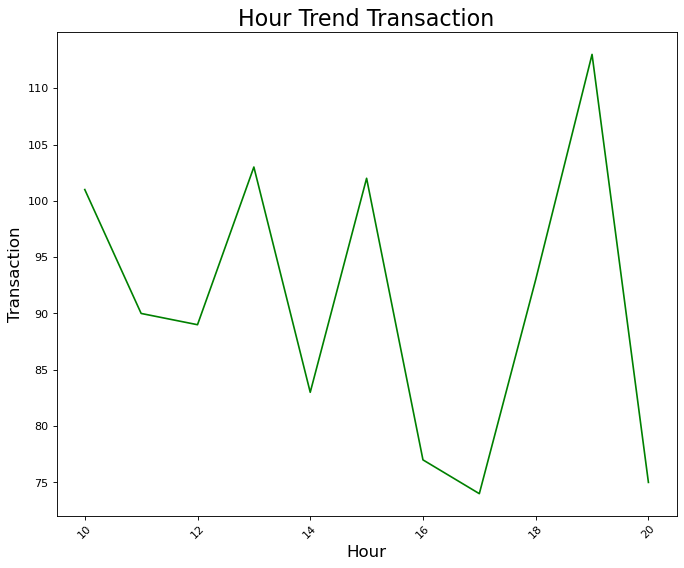

In [89]:
plt.figure(figsize=(10,8), dpi = 80)
plt.plot(df_time['Hour'], df_time['Transaction'], color='green')
plt.title('Hour Trend Transaction', size =20)
plt.xlabel("Hour",size = 15)
plt.ylabel("Transaction", size = 15)
plt.xticks(rotation=45)
plt.show()
## Peak transaction at 19:00 - 19:59 
## Bottom transaction at 17:00 - 18:00

#### MULTIVARIATE ANALYSIS

In [103]:
df_analysis1 = df.pivot_table(index=['Gender', 'Product line'], values='Quantity', aggfunc='sum')
df_analysis1.rename(columns = {'Total':'Sales'}, inplace=True)
df_analysis1
## Female mendominasi transaksi untuk produk Fashion Accessorris sedangkan Male mendominasi transaksi untuk produk Health and Beauty

Quantity
Gender Product line                    
Female Electronic accessories       488
       Fashion accessories          530
       Food and beverages           514
       Health and beauty            343
       Home and lifestyle           498
       Sports and travel            496
Male   Electronic accessories       483
       Fashion accessories          372
       Food and beverages           438
       Health and beauty            511
       Home and lifestyle           413
       Sports and travel            424

In [104]:
df_analysis2 = df.pivot_table(index=['Payment', 'Gender'], values='Total', aggfunc='count')
df_analysis2.rename(columns = {'Total':'Sales'}, inplace=True)
df_analysis2
## Male lebih suka berbelanja menggunakan ewallet sedangkan Female lebih suka cash

Sales
Payment     Gender       
Cash        Female    178
            Male      166
Credit card Female    163
            Male      148
Ewallet     Female    160
            Male      185

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Total Monthly transaction by Gender'}, xlabel='Payment', ylabel='count'>

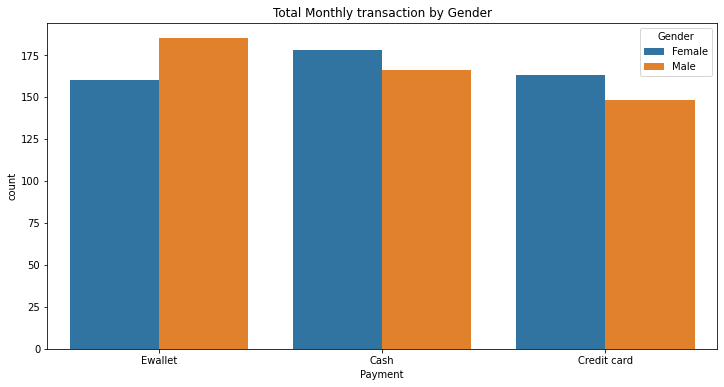

In [96]:
plt.figure(figsize=(12, 6))
plt.title('Total Monthly transaction by Gender')
sns.countplot(df['Payment'], hue = df.Gender)
## Male lebih suka berbelanja menggunakan ewallet sedangkan Female lebih suka cash

In [106]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month,Day Name,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1,Saturday,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,3,Friday,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,Sunday,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,1,Sunday,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2,Friday,10


# DATA INSIGHT

- Penjualan tiap cabang Antar Kota tidak berbeda jauh. Tetapi penjualan paling besar tetap ada di Yangon
- Kebanyakan pelanggan yang berbelanja di supermarket merupakan member (beda sedikit dengan nonmember)
- Wanita lebih banyak berbelanja dibandingkan laki-laki
- Produk yang paling banyak terjual adalah Electronic Accessoris sedangkan Health Beauty & Fashion Accessoris paling rendah 
- Kebanyakan pelanggan menggunakan e-wallet dan cash sebagai metode pembayaran 
- Peak transakasi terjadi pada hari Sabtu dan Selasa, sedangkan transaksi paling rendah terjadi pada Hari Senin
- Peak transaction terjadi pada pukul 19:00 - 19:59 sedangkan transaksi paling rendah terjadi 17:00 - 18:00
- Perempuan mendominasi pembelian fashion accessoris dan laki-laki mendominasi pembelian healthy beauty
- Laki-laki lebih suka berbelanja menggunakan ewallet sedangkan Female lebih suka cash

# SUMMARY & RECOMMENDATION

- Membuat promosi pada hari yang sepi (Senin) dengan penggunaan metode emoney untuk kategori penjualan Health Beauty
- Membuat promosi pada hari yang sepi (Senin) dengan penggunaan cash untuk kategori Fashion Accessoris
- Menfokuskan shift cashier pada jam-jam padat seperti pada pukul 19:00 - 19:59 dan mengurangi cashier pada jam 17:00 - 18:00